# Larvae Movement Detection

Motivation: Some experiments on behaviour studies use zebra fish larvae as animal model. The experiments collect numeric data from the animals like total time moving during experiment, how much time it spent in a dark field vs a ligth field and stuff like that. The experiment itself is easy (recording a small, silent, clean, harmless larva) but collecting the data demands a lot of time from high specialized people that could do less boring and more creative work. 

## Executing the script

On a terminal, type

    python larva_mov_quant.py <input video file > <output file name > <show>
    
where 	__**show**__ is and optional argument that deploys windows while processign the data which is not usefull if you're not making any tests.
 
The script will show the first frame of the video file. Which makes important cutting the ideo if your file does not start at the beggining of the experiment.
It will look like this 

<img src="1_Imagem_1_Placa_Petri.png">

Here the larva Petri Palte is select than the video will process only that piece of the video.
Make sure there's only one larva in the space selected.
You'll see this next image

<img src="2_image_Placa_petri.png">

This window shows up than you can select the borders of the plate in its highets diameter. It's not important if you'll use Mean/StandardDeviation classification for classifing your data.

## Visualizing the Data

Once processing is finished, there'll be the .csv file you named in the second argument of the script at the root directory.
You can now select and visualize this data.

In [1]:
import pandas as pd
import numpy as np 


# First, we laod the data
in_filename = input("Write the name of the file: ")
if ".csv" not in in_filename:
      in_filename += ".csv"
# Get Data Frame from .CSV
df = pd.read_csv(in_filename)


#df.setindex(0)
df.head()

Unnamed: 0  frame_intensity  time_stamp
0           0         1.084897    0.000000
1           2         1.351440    0.033333
2           4         1.323905    0.066667
3           6         1.296369    0.100000
4           8         1.388888    0.133333

This is how your data is organized in the csv.

The indexes are used to access the series data.
Plotting it is easy:

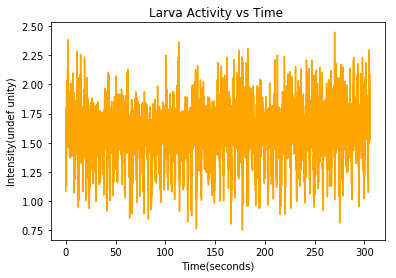

In [5]:
from matplotlib import pyplot as plt

plt.plot(df["time_stamp"], df["frame_intensity"],  color='orange')
plt.title("Larva Activity vs Time ")
plt.ylabel("Intensity(undef unity)")
plt.xlabel("Time(seconds)")
plt.show()

Its important to look up for mean and standard deviation

In [4]:
print("MEAN->", df["frame_intensity"].mean(), " , STD->", df["frame_intensity"].std())

MEAN-> 1.5705610133424004  , STD-> 0.1955065658101008


And maybe you want to see the histogram

In [6]:
plt.hist(df["frame_intensity"], bins = 30)
plt.ylabel("Incidencies")
plt.xlabel("Intensity")
plt.title("Larva Intensity Histogram")

Text(0.5,1,'Larva Intensity Histogram')

Which may be of no use. This data has no measuring units which makes necessary a classification of frames with high enogh intensity and others without it. 

In [23]:
# First, create a threshold
# It might be a number n standar deviations higher than the mean. In this case, 2 standard deviations
# the higher the threshould, the lower the false positives and higher the false negatives
threshold = df["frame_intensity"].mean()+2*df["frame_intensity"].std()

classified = df["frame_intensity"]>threshold

plt.plot(df["time_stamp"], classified,  color='orange')
plt.title("Larva Activity vs Time ")
plt.ylabel("Intensity(undef unity)")
plt.xlabel("Time(seconds)")
plt.show()

Ok, I know, it's not a good graph, mostly because the inumerous transitions from moving to not-moving are put one above the other and it had a bad visual effect.

But we are looking fot the larvae numbers :

In [20]:
total_time = 0
for stmp in classified:
    if stmp == 1:
        total_time += df['time_stamp'][1]
print("The total time spent moving is: ", total_time)
print("Which is ", total_time/df['time_stamp'][len(df['time_stamp'])-1]*100,"% of the experiment.")

The total time spent moving is:  35.56666666666721
Which is  11.631963370761147 % of the experiment.
